### Even smaller scales:

In [1]:
import h5py
import numpy as np
from matplotlib import pyplot as plt
from glob import glob
from os import path as op

In [2]:
dir_fft = '/home/qezlou/HD2/HETDEX/cosmo/data/fft_corr/1d/'
dir_pcount = '/home/qezlou/HD2/HETDEX/cosmo/data/1d/'

fft_files, pcount_files= [], []
for i in [200,201, 483, 484]:
    fft_files.append(op.join(dir_fft,f'Zheng07_seeds_compressed_10p_Box250_Part750_{str(i).rjust(4,"0")}.hdf5'))
    pcount_files.append(op.join(dir_pcount,f'Zheng07_seeds_compressed_10p_Box250_Part750_{str(i).rjust(4,"0")}.hdf5'))

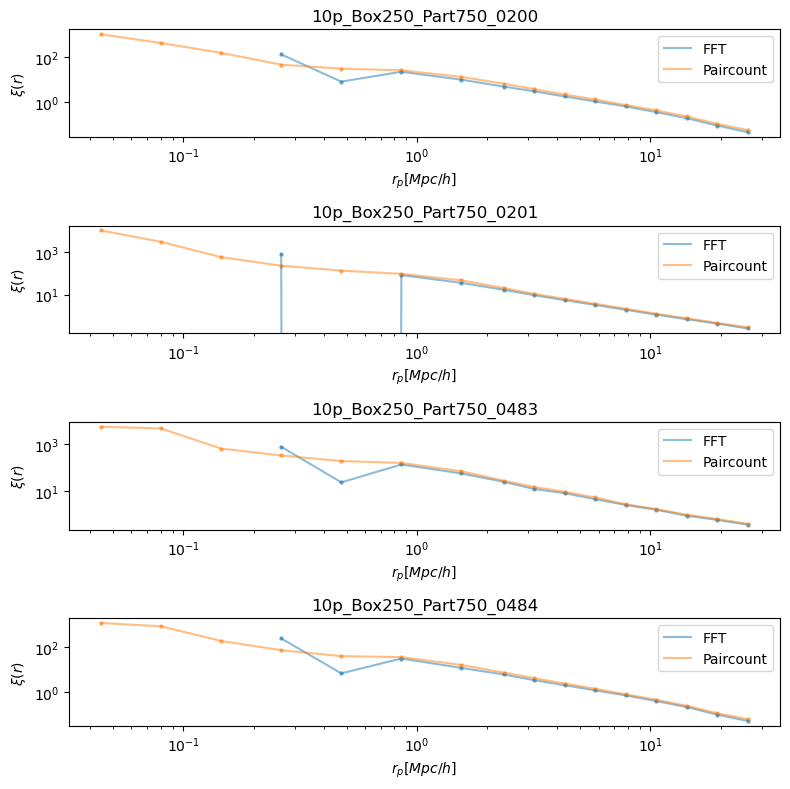

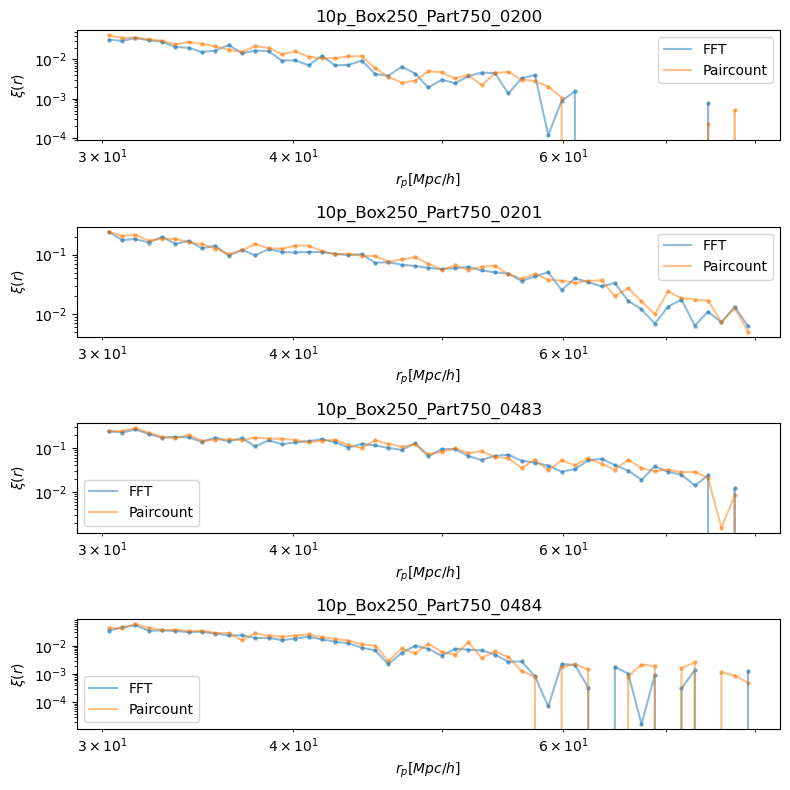

In [3]:
import numpy as np
from glob import glob
from os import path as op
import importlib
import plot
importlib.reload(plot)
plot_corr = plot.PlotCorr()

plot_corr.fft_vs_paircount(fft_files, pcount_files, r_range=(0,30))
plot_corr.fft_vs_paircount(fft_files, pcount_files, r_range=(30,80))

In [4]:
dir_fft = '/home/qezlou/HD2/HETDEX/cosmo/data/fft_corr/1d/nmesh_150kpc'
dir_pcount = '/home/qezlou/HD2/HETDEX/cosmo/data/1d/'

fft_files, pcount_files= [], []
for i in [200, 201, 483, 484]:
    fft_files.append(op.join(dir_fft,f'Zheng07_seeds_compressed_10p_Box250_Part750_{str(i).rjust(4,"0")}.hdf5'))
    pcount_files.append(op.join(dir_pcount,f'Zheng07_seeds_compressed_10p_Box250_Part750_{str(i).rjust(4,"0")}.hdf5'))

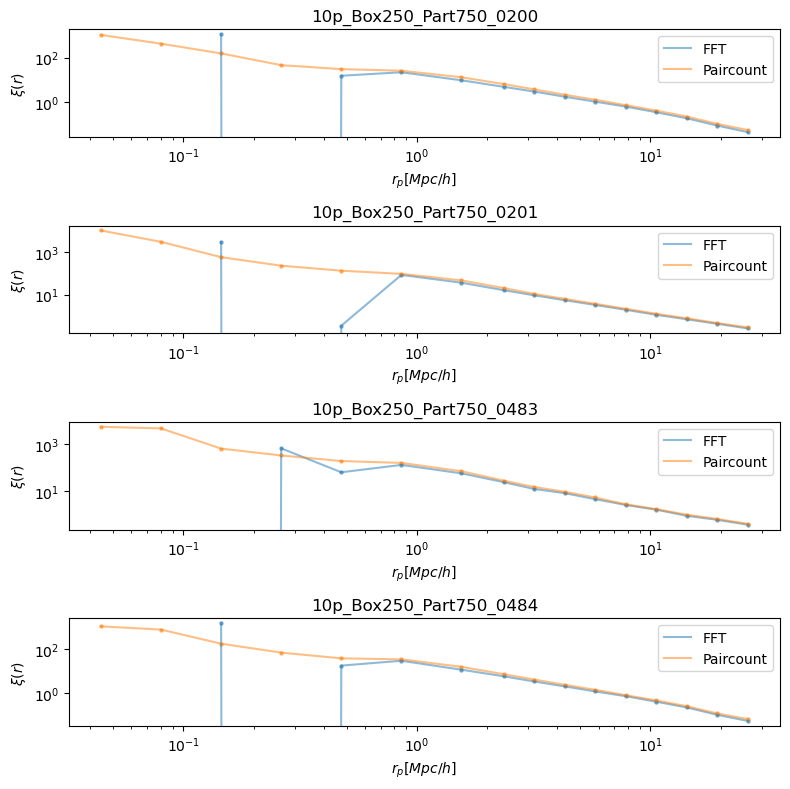

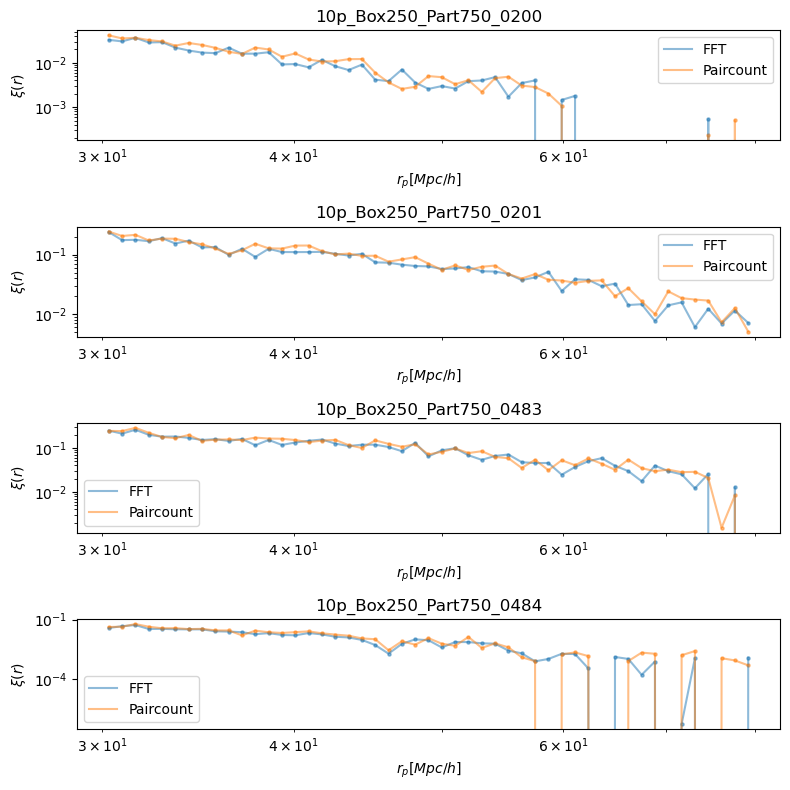

In [5]:
import numpy as np
from glob import glob
from os import path as op
import importlib
import plot
importlib.reload(plot)
plot_corr = plot.PlotCorr()

plot_corr.fft_vs_paircount(fft_files, pcount_files, r_range=(0,30))
plot_corr.fft_vs_paircount(fft_files, pcount_files, r_range=(30,80))

I don't understand why FFT model has more fluctuations comapred to the paircount. 